<a href="https://colab.research.google.com/github/Sim-mi-gyeong/DataAnalysis/blob/main/TermProject12_Before_and_After_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2020년 전후 (코로나로 인해) 전체 국가에서 증가/감소한 요소가 존재하는가?/Happiness Score에 변화가 있는가?
# 특히, 동아시아 국가의 2020년 전후 Happiness Score의 변화는 다른 국가들에 비해 어떠한가?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 각각의 csv파일을 불러와 df20__ 값에 저장
df2017=pd.read_csv('/content/drive/MyDrive/dataset/2017.csv')
df2018=pd.read_csv('/content/drive/MyDrive/dataset/2018.csv')
df2019=pd.read_csv('/content/drive/MyDrive/dataset/2019.csv')
df2020=pd.read_csv('/content/drive/MyDrive/dataset/2020.csv')
df2021=pd.read_csv('/content/drive/MyDrive/dataset/2021.csv')

In [5]:
# 2018년 데이터 중 결측값을 해당 column의 평균값으로 대체
df2018['Perceptions of corruption']=df2018['Perceptions of corruption'].fillna(df2018['Perceptions of corruption'].mean())

In [6]:
# 각각의 column 요소에 따라 전체 국가에 대한 연도별 평균값을 mean20__에 저장

col_list=['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

mean2017=df2017[col_list].mean()
mean2018=df2018[col_list].mean()
mean2019=df2019[col_list].mean()
mean2020=df2020[col_list].mean()
mean2021=df2021[col_list].mean()

# happy20_top10 = df2020.groupby('Country')['Score'].max().sort_values(ascending=False).head(10).reset_index()
# df2020.columns_top10 = ['Country','Score']

In [7]:
# mean20__의 값을 df_mean으로 병합 -> df_mean: 연도별 전체 국가의 각 요소별 평균

df_mean=pd.DataFrame(data=[mean2017, mean2018, mean2019, mean2020, mean2021], index=[2017,2018,2019,2020,2021])
df_mean

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2017,5.413126,1.005134,0.568586,0.416165,0.243110,0.122225
2018,5.442455,0.912294,0.616189,0.461629,0.177580,0.112106
2019,5.486741,0.932098,0.749392,0.398147,0.180203,0.110042
2020,5.538580,5.437659,0.816179,0.649455,0.788641,-0.019410
2021,5.562350,0.985329,0.527126,0.793993,-0.019308,0.725643


In [8]:
# 2017~2019년도(COVID-19 전) 전체 국가의 각 요소별 평균

mean1719=df_mean[col_list].iloc[:3].mean()
mean1719

Score                           5.447441
GDP per capita                  0.949842
Healthy life expectancy         0.644722
Freedom to make life choices    0.425314
Generosity                      0.200298
Perceptions of corruption       0.114791
dtype: float64

In [9]:
# 2020~2021년도(COVID-19 후) 전체 국가의 각 요소별 평균

mean20_21=df_mean[col_list].iloc[4:].mean()
mean20_21

Score                           5.562350
GDP per capita                  0.985329
Healthy life expectancy         0.527126
Freedom to make life choices    0.793993
Generosity                     -0.019308
Perceptions of corruption       0.725643
dtype: float64

In [10]:
# COVID-19 전과 후의 각 요소별 평균 차이(변화량)

mean_diff=pd.DataFrame(data=mean2021-mean1719)
mean_diff

,0
Score,0.114909
GDP per capita,0.035487
Healthy life expectancy,-0.117596
Freedom to make life choices,0.368679
Generosity,-0.219606
Perceptions of corruption,0.610852


In [11]:
# 평균에 대한 계산을 한 요소의 이름
col_list

['Score',
 'GDP per capita',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

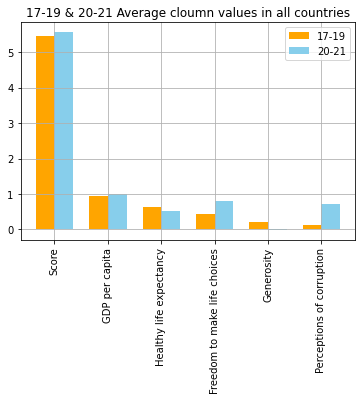

In [12]:
# 2017~2019 평균 data 값 분포와 2020~2021 평균 data 값(요소별 평균)의 분포

fig, ax=plt.subplots()

width = 0.35
index=np.arange(len(col_list))

p1=ax.bar(index-width/2, mean1719.tolist(), width, label='17-19', color='orange')
p2=ax.bar(index+width/2, mean2021.tolist(), width, label='20-21', color='skyblue')
ax.set_xticks(index)
ax.set_xticklabels(col_list)
ax.set_title("17-19 & 20-21 Average cloumn values in all countries")
plt.xticks(rotation='vertical')

ax.legend()
plt.grid()
plt.show()

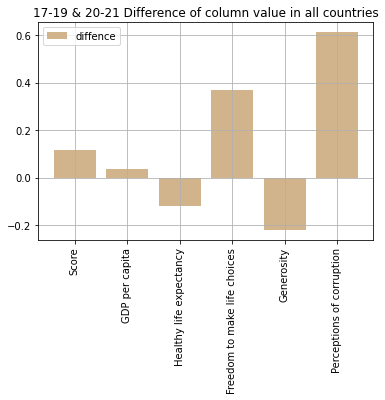

In [13]:
# 전체 국가의 2020년 전후 각 column 값의 변화(20-21에 대한 17-19의 차이)

fig, ax=plt.subplots()

mean_diff=mean2021-mean1719
# 2021-1719 이므로 양수:2021이 더 큰 값, 음수:2021이 더 작은 값
ax.bar(index, mean_diff.tolist(), label='diffence', facecolor='tan')
ax.set_title('17-19 & 20-21 Difference of column value in all countries')
ax.set_xticks(index)
ax.set_xticklabels(col_list)
plt.xticks(rotation='vertical')
plt.grid()
plt.legend()
plt.show()

# Happiness Score가 오히려 2021 시기에 증가
# -> 코로나와 같은 세계적 재해가 행복 지수에 영향을 주지 않았음을 확인 가능

In [14]:
# East_Asia 국가에 해당하는 row 출력

East_Asia2017=df2017[df2017['Regional indicator']=='East Asia']
East_Asia2017

East_Asia2018=df2018[df2018['Regional indicator']=='East Asia']
East_Asia2018

East_Asia2019=df2017[df2019['Regional indicator']=='East Asia']
East_Asia2019

East_Asia2020=df2020[df2020['Regional indicator']=='East Asia']
East_Asia2020

East_Asia2021=df2021[df2021['Regional indicator']=='East Asia']
East_Asia2021

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
25,China,East Asia,5.339,1.061,0.665,0.904,-0.146,0.755
50,Hong Kong S.A.R. of China,East Asia,5.477,1.525,0.893,0.717,0.067,0.403
62,Japan,East Asia,5.940,1.389,0.838,0.796,-0.258,0.638
85,Mongolia,East Asia,5.677,0.966,0.442,0.708,0.116,0.856
118,South Korea,East Asia,5.845,1.403,0.801,0.672,-0.083,0.727
123,Taiwan,East Asia,6.584,1.480,0.665,0.784,-0.070,0.721


In [15]:
# 동아시아 지역에 속하는 국가의 수 = 6개 국가

num_East_Asia=len(East_Asia2017)
num_East_Asia

6

In [16]:
# 각 연도별 동아시아 국가의 Happiness Score 평균

East_Asia2017_mean=East_Asia2017['Score'].mean()
East_Asia2018_mean=East_Asia2018['Score'].mean()
East_Asia2019_mean=East_Asia2019['Score'].mean()

East_Asia2020_mean=East_Asia2020['Score'].mean()
East_Asia2021_mean=East_Asia2021['Score'].mean()

In [17]:
# 동아시아 국가의 Happiness Score 평균의  2017~2019년과 2020~2021년에 대한 평균 

East_Asia_mean_1719=np.mean([East_Asia2017_mean, East_Asia2018_mean, East_Asia2019_mean])
East_Asia_mean_2021=np.mean([East_Asia2020_mean, East_Asia2021_mean])

print("East_Asia_mean_1719: ", East_Asia_mean_1719)
print("East_Asia_mean_2021: ", East_Asia_mean_2021)

East_Asia_mean_1719:  5.655111070777779
East_Asia_mean_2021:  5.762591641083333


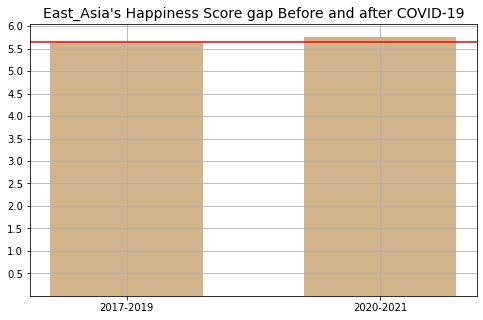

In [18]:
# 동아시아 국가의 2020년 전후 Happiness Sccore 변화

fig, ax=plt.subplots(figsize=(8,5))

ax.bar(['2017-2019', '2020-2021'], [East_Asia_mean_1719, East_Asia_mean_2021], width=0.6, color='tan')
ax.set_yticks(([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]))
ax.axhline(East_Asia_mean_1719, color='red', linewidth=1.5)
ax.set_title("East_Asia's Happiness Score gap Before and after COVID-19", fontsize=14)

plt.grid()
plt.show()

# 동아시아 국가에 한정되어서도, 2017~2019년에 비해 2020~2021년에 오히려 Happiness Score가 증가했음을 알 수 있음

In [19]:
# All_Country_diff: 전체 국가의 2020년 전후 Happiness Score 차이
# East_Asia_diff:동아시아 국가의 2020년 전후 Happiness Score 차이
# Score_Difference: 동아시아 국가에 대한 전체 국가와의 2020년 전후 Happiness Score 차이 

All_country_diff=mean_diff.loc['Score']
East_Asia_diff=(East_Asia_mean_2021)-(East_Asia_mean_1719)
Score_Difference=(East_Asia_diff)-(All_country_diff)
print("All_country_diff Score: ", All_country_diff)
print("East_Asia_diff Score: ", East_Asia_diff)
print("Score Difference: ", Score_Difference)

All_country_diff Score:  0.11490909224475665
East_Asia_diff Score:  0.10748057030555369
Score Difference:  -0.007428521939202959


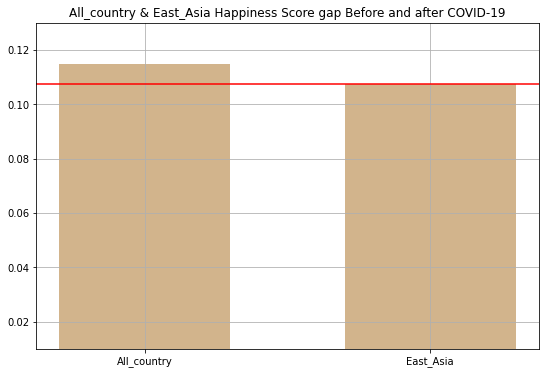

In [20]:
# 2020년 전후 전체 국가와 동아시아 국가에 대한 Happiness Score 증감 크기 비교

fig, ax=plt.subplots(figsize=(9,6))
plt.grid()
ax.bar(['All_country', 'East_Asia'], [All_country_diff, East_Asia_diff], width=0.6, color='tan')
ax.set_ylim(0.01, 0.13)
ax.set_xticks(['All_country', 'East_Asia'])
ax.set_title("All_country & East_Asia Happiness Score gap Before and after COVID-19")
ax.axhline(East_Asia_diff, color='red', linewidth=1.5)

plt.show()

# 동아시아 국가에서 Happiness Score에 대한 큰 변화가 없음을 알 수 있다.(오히려 전체 국가의 평균보다 못 미치는 수준)